# HST Python Tutorial: Hubble Catalog of Variables light curve period analysis

*Author: Deborah Baines, Juan-Carlos Segovia, Raúl Gutierrez*

This use case is partially based on the paper by [Brown et. al. 2004, AJ 127, 2738](https://ui.adsabs.harvard.edu/abs/2004AJ....127.2738B/abstract) 'RR Lyrae Stars in the Andromeda Halo from Deep Imaging with the Advanced Camera for Surveys'.

Workflow:
1. Query the Hubble Catalog of Variables (HCV) for an RR Lyrae in the Halo of M31 (matchid = 106259089).
2. Plot the light curves as a function of observation date.
3. Compute the Lomb-Scargle periodogram of the light curve in one band.
4. Phase and plot the light curve.

Additional:
5. Perform a cone search around the RR Lyrae star and retrieve the HCV sources. 
6. Download an associated HLA image.
7. Plot these sources on an associated HLA image and plot the RR Lyrae star in a different colour. 
8. For the RR Lyrae star, perform a cutout around the star and show the images for the brightest and faintest magnitudes. 

In [1]:
# Import the relevant modules
from astroquery.utils.tap.core import TapPlus
import numpy as np
from astropy.stats import LombScargle

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy import visualization

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1. Query the Hubble Catalog of Variables (HCV) for an RR Lyrae in the Halo of M31 

In this example, the RR Lyrae of interest is matchid = 106259089 (or V10 in Brown+ 2004).

In [19]:
# Call the HST TAP and print the available tables
hst = TapPlus(url="http://hst.esac.esa.int/tap-server/tap")
tables = hst.load_tables(only_names=True)
for table in (tables):
      print(table.get_qualified_name())

Created TAP+ (v1.0.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Retrieving tables...
403 Forbidden


HTTPError: Forbidden

In [3]:
# Inspect the columns of the HCV table
hst = TapPlus(url="http://hst.esac.esa.int/tap-server/tap")
hcv_table = hst.load_table('hcv.hcv')
for column in (hcv_table.columns):
    print(column.name)

Created TAP+ (v1.0.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Retrieving table 'hcv.hcv'
Parsing table 'hcv.hcv'...
Done.
chi2
ci_d
ci_v
d_d
dec
d_v
expert_class
filter
groupid
lightcurve_cm
lightcurve_d
lightcurve_e
lightcurve_i
lightcurve_m
lightcurve_r
mad
matchid
pipeline_class
ra


Query the HCV via an Astronomical Data Query Language (ADQL) query. See [here](https://gea.esac.esa.int/archive-help/adql/examples/index.html) for more information and examples of ADQL queries. 

In [4]:
# Query the HCV for the RR Lyrae variable star with matchid = 106259089 and for the filter ACS_F814W:
job1 = hst.launch_job_async("SELECT * FROM hcv.hcv WHERE matchid = 106259089 AND filter LIKE '%ACS_F814W%'")
hcv_f814w = job1.get_results()
job1.get_data()

# Brings back a table of 33 rows. 

Query finished.


<Table masked=True length=33>
        chi2               ci_d        ... pipeline_class         ra        
                           days        ...                       deg        
       object            float64       ...     int32           float64      
------------------- ------------------ ... -------------- ------------------
17.9332353549977981  52611.26638278016 ...              2 11.502689361572266
17.9332353549977981  52611.57040482061 ...              2 11.502689361572266
17.9332353549977981  52612.09501705086 ...              2 11.502689361572266
17.9332353549977981 52614.096183951246 ...              2 11.502689361572266
17.9332353549977981   52614.7064349039 ...              2 11.502689361572266
17.9332353549977981  52615.44050916098 ...              2 11.502689361572266
17.9332353549977981  52616.09770231927 ...              2 11.502689361572266
17.9332353549977981  52616.44162601838 ...              2 11.502689361572266
17.9332353549977981  52618.30910287611 ...              2 11.502689361572266
                ...                ... ...            ...                ...
17.9332353549977981 52634.534542709356 ...              2 11.502689361572266
17.9332353549977981 52636.535665495554 ...              2 11.502689361572266
17.9332353549977981 52639.632320828736 ...              2 11.502689361572266
17.9332353549977981  52644.20626751962 ...              2 11.502689361572266
17.9332353549977981 52644.339669304434 ...              2 11.502689361572266
17.9332353549977981 52646.140631039394 ...              2 11.502689361572266
17.9332353549977981  52646.27403380303 ...              2 11.502689361572266
17.9332353549977981 52646.407442505704 ...              2 11.502689361572266
17.9332353549977981  52648.34181157872 ...              2 11.502689361572266
17.9332353549977981  52650.40960101038 ...              2 11.502689361572266

In [5]:
# Query the HCV for the RR Lyrae variable star with matchid = 106259089 and for the filter ACS_F606W:
job2 = hst.launch_job_async("SELECT * FROM hcv.hcv WHERE matchid = 106259089 AND filter LIKE '%ACS_F606W%'")
hcv_f606w = job2.get_results()
job2.get_data()

# Brings back a table of 29 rows. 

Query finished.


<Table masked=True length=29>
        chi2               ci_d        ... pipeline_class         ra        
                           days        ...                       deg        
       object            float64       ...     int32           float64      
------------------- ------------------ ... -------------- ------------------
60.0598271277244109 52610.161817079876 ...              2 11.502689361572266
60.0598271277244109  52611.43696170254 ...              2 11.502689361572266
60.0598271277244109 52611.703842436196 ...              2 11.502689361572266
60.0598271277244109  52612.33606466558 ...              2 11.502689361572266
60.0598271277244109  52614.30502305669 ...              2 11.502689361572266
60.0598271277244109  52615.09689807985 ...              2 11.502689361572266
60.0598271277244109 52615.707459393656 ...              2 11.502689361572266
60.0598271277244109 52616.306695474545 ...              2 11.502689361572266
60.0598271277244109  52616.57511546649 ...              2 11.502689361572266
                ...                ... ...            ...                ...
60.0598271277244109 52632.099195476854 ...              2 11.502689361572266
60.0598271277244109  52632.39987250231 ...              2 11.502689361572266
60.0598271277244109  52632.53329266794 ...              2 11.502689361572266
60.0598271277244109  52633.53394658561 ...              2 11.502689361572266
60.0598271277244109  52636.40226843394 ...              2 11.502689361572266
60.0598271277244109   52636.7406423497 ...              2 11.502689361572266
60.0598271277244109  52640.40434069326 ...              2 11.502689361572266
60.0598271277244109 52644.473090491956 ...              2 11.502689361572266
60.0598271277244109  52650.24182896991 ...              2 11.502689361572266
60.0598271277244109  55204.29098817939 ...              2 11.502689361572266

The above steps can also be performed using the ESA_Hubble astroquery module. Currently this module can be downloaded from the dev version of astroquery, details [here](https://astroquery.readthedocs.io/en/latest/). 

The ESA_Hubble module should be available in astropy version 4.0 onwards. More details can be found [here](https://astroquery.readthedocs.io/en/latest/esa_hubble/esa_hubble.html). 

In [6]:
# Perform exactly the same query as above, but this time using the astroquery.esa_hubble module

# Import ESAHubble from astroquery.esa_hubble
from astroquery.esa_hubble import ESAHubble

job = ESAHubble.query_hst_tap("SELECT * FROM hcv.hcv WHERE matchid = 106259089 AND filter LIKE '%ACS_F606W%'")
hcv_f606w = job.get_results()
job.get_data()

Created TAP+ (v1.0.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


<Table masked=True length=29>
        chi2               ci_d        ... pipeline_class         ra        
                           days        ...                       deg        
       object            float64       ...     int32           float64      
------------------- ------------------ ... -------------- ------------------
60.0598271277244109 52610.161817079876 ...              2 11.502689361572266
60.0598271277244109  52611.43696170254 ...              2 11.502689361572266
60.0598271277244109 52611.703842436196 ...              2 11.502689361572266
60.0598271277244109  52612.33606466558 ...              2 11.502689361572266
60.0598271277244109  52614.30502305669 ...              2 11.502689361572266
60.0598271277244109  52615.09689807985 ...              2 11.502689361572266
60.0598271277244109 52615.707459393656 ...              2 11.502689361572266
60.0598271277244109 52616.306695474545 ...              2 11.502689361572266
60.0598271277244109  52616.57511546649 ...              2 11.502689361572266
                ...                ... ...            ...                ...
60.0598271277244109 52632.099195476854 ...              2 11.502689361572266
60.0598271277244109  52632.39987250231 ...              2 11.502689361572266
60.0598271277244109  52632.53329266794 ...              2 11.502689361572266
60.0598271277244109  52633.53394658561 ...              2 11.502689361572266
60.0598271277244109  52636.40226843394 ...              2 11.502689361572266
60.0598271277244109   52636.7406423497 ...              2 11.502689361572266
60.0598271277244109  52640.40434069326 ...              2 11.502689361572266
60.0598271277244109 52644.473090491956 ...              2 11.502689361572266
60.0598271277244109  52650.24182896991 ...              2 11.502689361572266
60.0598271277244109  55204.29098817939 ...              2 11.502689361572266

### Step 2. Plot the light curves as a function of observation date

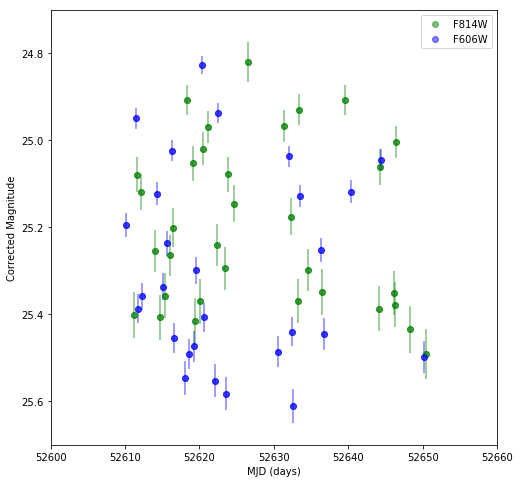

In [7]:
#Plotting the light curves (note, ignoring the one F606W value at MJD = 55204.29)
x = hcv_f814w['lightcurve_d']
y = hcv_f814w['lightcurve_cm']
yerr = hcv_f814w['lightcurve_e']
x2 = hcv_f606w['lightcurve_d']
y2 = hcv_f606w['lightcurve_cm']
yerr2 = hcv_f606w['lightcurve_e']


plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='g', alpha=0.5)
plt.errorbar(x, y, yerr, fmt='o', color='g', alpha=0.5)
plt.scatter(x2, y2, color='b', alpha=0.5)
plt.errorbar(x2, y2, yerr2, fmt='o', color='b', alpha=0.5)
plt.xlim(52600.0, 52660.0)
plt.ylim(25.7, 24.7)  # flip the y axis
plt.xlabel('MJD (days)')
plt.ylabel('Corrected Magnitude')
plt.legend(["F814W", "F606W"])
plt.show()

### Step 3. Compute the Lomb-Scargle periodogram of the light curve in one band

Generate a periodgram using the [Astropy 'LombScargle'](https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html) function and obtain the period based on the best frequency. More information can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html).

Best found period: 0.6874079029387833 days


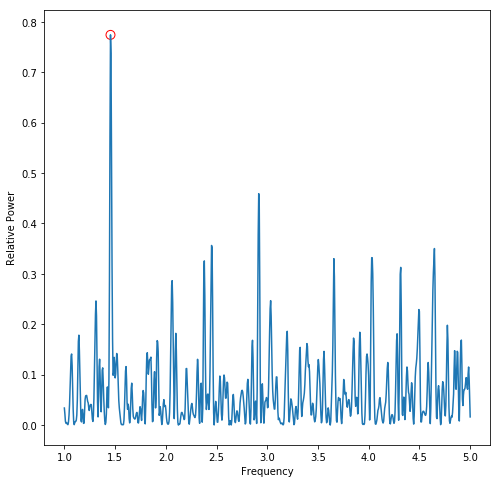

In [8]:
# For the ACS_F814W filter:
hcv_f814w['lightcurve_d'].unit = None
hcv_f814w['lightcurve_cm'].unit = None
hcv_f814w['lightcurve_e'].unit = None

#generate periodogram
frequency, power = LombScargle(hcv_f814w['lightcurve_d'], \
                               hcv_f814w['lightcurve_cm'], \
                               hcv_f814w['lightcurve_e']).autopower(minimum_frequency=1.0,\
                                                                        maximum_frequency=5.0)

best_frequency = frequency[np.argmax(power)]
best_power = power[np.argmax(power)]

plt.figure(figsize=(8, 8))
plt.scatter([best_frequency], [best_power], facecolors='none', edgecolors='r', s=80)
plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Relative Power')

#print(best_frequency)
period=1/best_frequency
print("Best found period: " + str(period) + " days")

This result compares well with Brown+ 2004, who found a period of 0.687 days.

### Step 4. Phase and plot the light curve

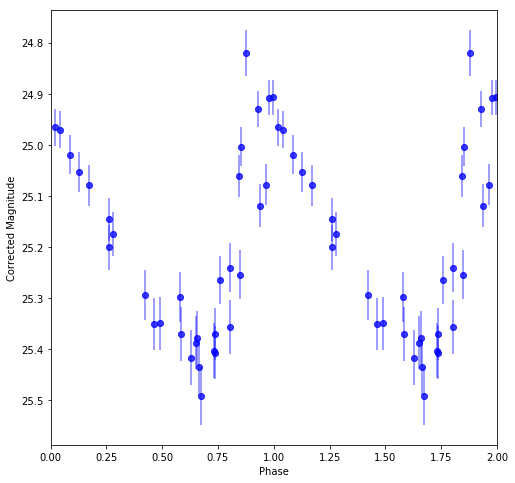

In [9]:
phase = (hcv_f814w['lightcurve_d'] / period) % 1
plt.figure(figsize=(8, 8))
plt.axes().invert_yaxis()
plt.scatter(phase, hcv_f814w['lightcurve_cm'], color='b', alpha=0.5)
plt.errorbar(phase, hcv_f814w['lightcurve_cm'], hcv_f814w['lightcurve_e'], fmt='o', color='b', alpha=0.5)
plt.scatter(phase+1, hcv_f814w['lightcurve_cm'], color='b', alpha=0.5)
plt.errorbar(phase+1, hcv_f814w['lightcurve_cm'], hcv_f814w['lightcurve_e'], fmt='o', color='b', alpha=0.5)
plt.xlim(0.0, 2.0)
#plt.ylim(25.7, 24.7)  # flip the y axis
plt.xlabel('Phase')
plt.ylabel('Corrected Magnitude')
plt.show()

Check the results by increasing and decreasing the period:

In [11]:
from ipywidgets import widgets
from ipywidgets import interact

def fn(x):
    print("period=" + str(x))
    phase = (hcv_f814w['lightcurve_d'] / x) % 1
    #print(phase)
    plt.figure(figsize=(8, 8))
    plt.axes().invert_yaxis()
    plt.scatter(phase, hcv_f814w['lightcurve_cm'], color='b', alpha=0.3)
    plt.errorbar(phase, hcv_f814w['lightcurve_cm'], hcv_f814w['lightcurve_e'], fmt='o', color='b', alpha=0.3)
    plt.xlabel('Phase')
    plt.ylabel('Corrected Magnitude')
    plt.show()
#interact(fn, x=period)
#interact(fn, x=period)
max = (period + period*0.01)
min = (period - period*0.01)
interact(fn, x=widgets.FloatSlider(min=min,max=max,step=0.00005,value=period));

interactive(children=(FloatSlider(value=0.6874079029387833, description='x', max=0.6942819819681711, min=0.680…

### Additional Steps

### Step 5. Perform a cone search around the RR Lyrae star and retrieve the HCV sources. 

In [12]:
hst = TapPlus(url="http://hst.esac.esa.int/tap-server/tap")

# Performing a cone search of radius 3 arcminutes:
job3 = hst.launch_job_async("SELECT * FROM hcv.hcv \
WHERE 1=CONTAINS( \
  POINT('ICRS', ra, dec), \
  CIRCLE('ICRS', 11.50269, +40.68417, 0.05))")
hcv = job3.get_results()
job3.get_data()

# Returns 3335 rows. Note the number of rows is larger than the number of sources since the filter information
# and magnitudes (light curves) are all given in the one (flattened) table.

Created TAP+ (v1.0.1) - Connection:
	Host: hst.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Query finished.


<Table masked=True length=3335>
        chi2               ci_d        ... pipeline_class         ra        
                           days        ...                       deg        
       object            float64       ...     int32           float64      
------------------- ------------------ ... -------------- ------------------
3.09628240816075495  52611.26638278016 ...              1 11.494104385375977
3.09628240816075495   52614.7064349039 ...              1 11.494104385375977
3.09628240816075495  52616.09770231927 ...              1 11.494104385375977
3.09628240816075495 52626.490075099515 ...              1 11.494104385375977
3.09628240816075495  52631.39916067012 ...              1 11.494104385375977
3.09628240816075495  52644.20626751962 ...              1 11.494104385375977
3.09628240816075495  52646.27403380303 ...              1 11.494104385375977
5.55475441578078222  52611.26638278016 ...              1 11.492891311645508
5.55475441578078222  52611.57040482061 ...              1 11.492891311645508
                ...                ... ...            ...                ...
10.5620890982210387 52632.099195476854 ...              1   11.4900484085083
10.5620890982210387  52632.39987250231 ...              1   11.4900484085083
10.5620890982210387  52632.53329266794 ...              1   11.4900484085083
10.5620890982210387  52633.53394658561 ...              1   11.4900484085083
10.5620890982210387  52636.40226843394 ...              1   11.4900484085083
10.5620890982210387   52636.7406423497 ...              1   11.4900484085083
10.5620890982210387  52640.40434069326 ...              1   11.4900484085083
10.5620890982210387 52644.473090491956 ...              1   11.4900484085083
10.5620890982210387  52650.24182896991 ...              1   11.4900484085083
10.5620890982210387  55204.29098817939 ...              1   11.4900484085083

### Step 6. Download an associated HLA image.

These steps require the ESA_Hubble astroquery module. Currently this module can be downloaded from the dev version of astroquery, details [here](https://astroquery.readthedocs.io/en/latest/). 

The ESA_Hubble module should be available in astropy version 4.0 onwards. More details can be found [here](https://astroquery.readthedocs.io/en/latest/esa_hubble/esa_hubble.html). 

In [13]:
# The associated HLA images are found in the HCV column lightcurve_i:
print (hcv_f814w['lightcurve_i'])

       lightcurve_i      
-------------------------
hst_9453_02_acs_wfc_f814w
hst_9453_04_acs_wfc_f814w
hst_9453_06_acs_wfc_f814w
hst_9453_08_acs_wfc_f814w
hst_9453_10_acs_wfc_f814w
hst_9453_12_acs_wfc_f814w
hst_9453_14_acs_wfc_f814w
hst_9453_16_acs_wfc_f814w
hst_9453_20_acs_wfc_f814w
hst_9453_22_acs_wfc_f814w
                      ...
hst_9453_46_acs_wfc_f814w
hst_9453_48_acs_wfc_f814w
hst_9453_50_acs_wfc_f814w
hst_9453_42_acs_wfc_f814w
hst_9453_54_acs_wfc_f814w
hst_9453_52_acs_wfc_f814w
hst_9453_56_acs_wfc_f814w
hst_9453_57_acs_wfc_f814w
hst_9453_58_acs_wfc_f814w
hst_9453_60_acs_wfc_f814w
hst_9453_59_acs_wfc_f814w
Length = 33 rows


In [14]:
# Download a single image from the ESA Hubble Science Archive using the astroquery.esa_hubble module.

# A single observation has the prefix 'drz' (drizzle). Therefore the files to download are: 
# hst_9453_**_acs_wfc_f814w_drz.fits, where ** is a number

from astroquery.esa_hubble import ESAHubble
ESAHubble.get_artifact("hst_9453_02_acs_wfc_f814w_drz.fits")

image_file = "hst_9453_02_acs_wfc_f814w_drz.fits"

http://archives.esac.esa.int/ehst-sl-server/servlet/data-action?ARTIFACT_ID=hst_9453_02_acs_wfc_f814w_drz.fits
File hst_9453_02_acs_wfc_f814w_drz.fits downloaded to current directory


In [15]:
# Check the headers
hdu_list = fits.open(image_file)
hdu_list.info()
hdu_list[0].header

Filename: hst_9453_02_acs_wfc_f814w_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     861   ()      
  1  SCI           1 ImageHDU        86   (5185, 5166)   float32   
  2  WHT           1 ImageHDU        46   (5185, 5166)   float32   
  3  CTX           1 ImageHDU        39   (5185, 5166)   int32   
  4  HDRTAB        1 BinTableHDU    631   8R x 311C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, D, J, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 23A, D, D, D, D, J, J, J, 8A, J, 23A, 9A, 19A, J, 4A, J, J, J, J, J, J, 23A, D, D, D, D, J, J, 3A, 3A, 4A, 4A, J, D, D, D, 3A, 1A, J, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, J, D, 6A, 9A, 8A, D, D, J, 4A, 18A, 3A, J, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, J, J, J, J, J, J, J, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, J, 1A, 3A, 1A, D, 3A, 6A, J, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-08-23         ' / Date FITS file was generated                  
IRAF-TLM= '2017-08-23T16:02:22' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'ACS   '             / identifier for instrument used to acquire data 
                            

In [16]:
# Inspect the array
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(5166, 5185)


### Step 7. Plot the sources on top of the HLA image.

In [17]:
from astropy.wcs import WCS

wcs = WCS(hdu_list[1].header)
pix = wcs.wcs.cdelt[1]*3600.0 # pixel size in arcsec

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 11.52852151701503  40.70915097493346  
CRPIX : 2592.999999999834  2583.499999999835  
CD1_1 CD1_2  : -1.3888888888888e-05  0.0  
CD2_1 CD2_2  : 0.0  1.38888888888896e-05  
NAXIS : 5185  5166


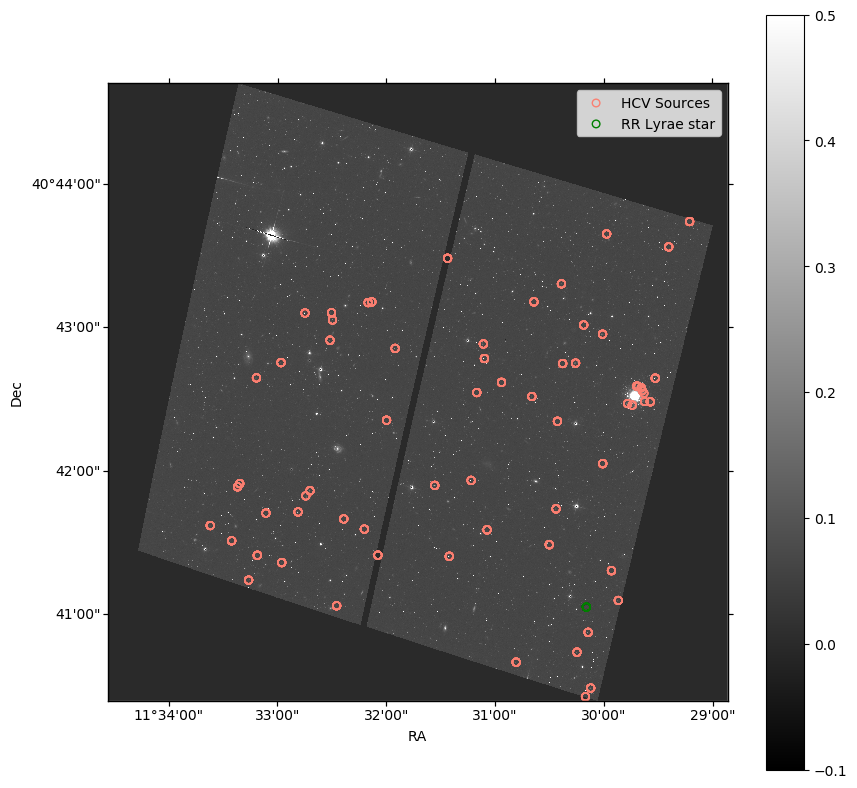

In [18]:
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize, ManualInterval)

# Create an ImageNormalize object
norm = ImageNormalize(image_data, interval = ManualInterval(-0.1,0.5))
print(wcs)

# Display the image
fig = plt.figure(figsize=(10,10),dpi=100)
ax = fig.add_subplot(111,projection=wcs)
im = ax.imshow(image_data, cmap='gray', origin='lower', norm=norm)
p1 = ax.scatter(hcv['ra'],hcv['dec'],transform=ax.get_transform('world'), \
                s=30, edgecolor='salmon', facecolor='none', label='HCV')
p2 = ax.scatter(hcv_f814w['ra'],hcv_f814w['dec'],transform=ax.get_transform('world'), \
                s=30, edgecolor='green', facecolor='none', label='RR Lyrae')
fig.colorbar(im)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.legend(["HCV Sources", "RR Lyrae star"])

### Step 8. Plot cutouts around the RR Lyrae star for the brightest and faintest magnitudes.

**In this example we are calling the [HLA cutout service from the STScI]("https://hla.stsci.edu/fitscutcgi_interface.html") to plot the cutouts (within a notebook markdown cell). The RR Lyrae star is in the centre of the image.**




The brightest corrected magnitude for F814W is : lightcurve_cm = 24.820026461811118; and corresponds to image lightcurve_i = hst_9453_61_acs_wfc_f814w :

<img src="https://hla.stsci.edu/cgi-bin/fitscut.cgi?red=hst_9453_61_acs_wfc_f814w&RA=11.50269&Dec=40.68417&size=29&output_size=256
"> 

And the faintest corrected magnitude for F814W is : lightcurve_cm = 25.49112826041771; and corresponds to image lightcurve_i = hst_9453_59_acs_wfc_f814w
<img src="https://hla.stsci.edu/cgi-bin/fitscut.cgi?red=hst_9453_59_acs_wfc_f814w&RA=11.50269&Dec=40.68417&size=29&output_size=256
"> 

The brightest corrected magnitude for F606W is : lightcurve_cm = 24.827273229936768; and corresponds to image  lightcurve_i = hst_9453_27_acs_wfc_f606w :

<img src="https://hla.stsci.edu/cgi-bin/fitscut.cgi?red=hst_9453_27_acs_wfc_f606w&RA=11.50269&Dec=40.68417&size=29&output_size=256
">

The faintest corrected magnitude for F606W is : lightcurve_cm = 25.61165283094627; and corresponds to image lightcurve_i = hst_9453_45_acs_wfc_f606w :

<img src="https://hla.stsci.edu/cgi-bin/fitscut.cgi?red=hst_9453_45_acs_wfc_f606w&RA=11.50269&Dec=40.68417&size=29&output_size=256
">